In [1]:
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
random.seed(0)

In [70]:
df = pd.read_csv('./smoke_detection_iot.csv', index_col=0)

In [71]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [72]:
time = []
for i in df['UTC']:
    t = datetime.fromtimestamp(i)
    time.append(t)
df['Time'] = time

In [73]:
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,Time
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,2022-06-09 02:08:51
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,2022-06-09 02:08:52
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,2022-06-09 02:08:53
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,2022-06-09 02:08:54
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,2022-06-09 02:08:55


In [74]:
df = df.drop(columns=['UTC', 'CNT'])

In [75]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm,Time
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 02:08:51
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 02:08:52
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 02:08:53
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 02:08:54
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0,2022-06-09 02:08:55


<IPython.core.display.Javascript object>


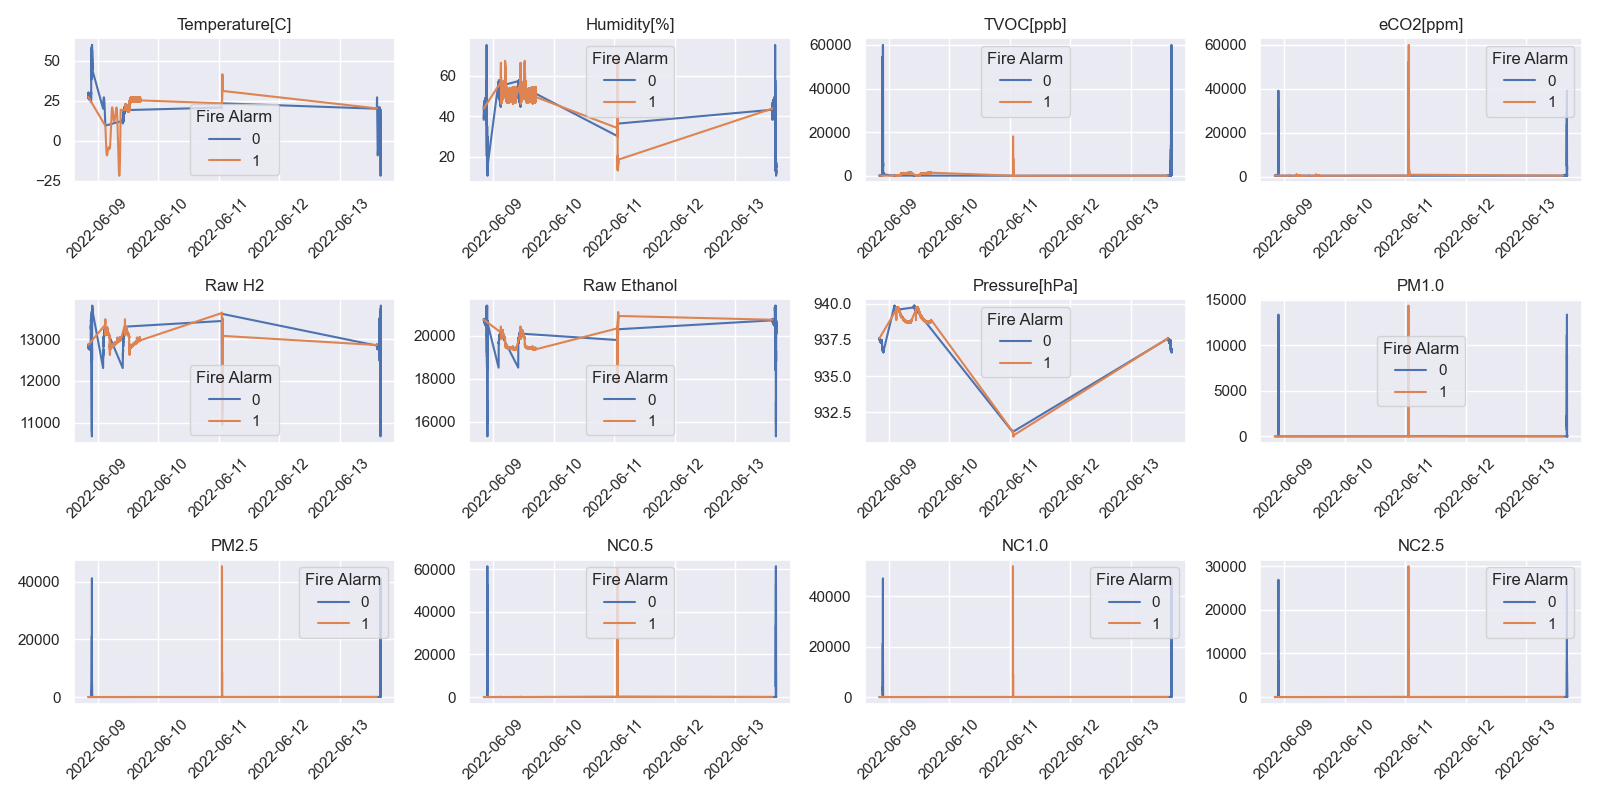

In [76]:
plt.figure(figsize=(16,8))
for i,j in zip(df.columns[:-2], range(len(df.columns)-2)):
    sns.set_theme(style="darkgrid")
    plt.subplot(3,4,j+1)
    plt.xticks(rotation=45)
    plt.title(i)
    sns.lineplot(data = df, x=df['Time'], y=df[i], hue=df['Fire Alarm'])
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()

In [77]:
df = df.drop(columns=['Time'])

In [78]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [79]:
df.isnull().sum()

Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
Fire Alarm        0
dtype: int64

<IPython.core.display.Javascript object>


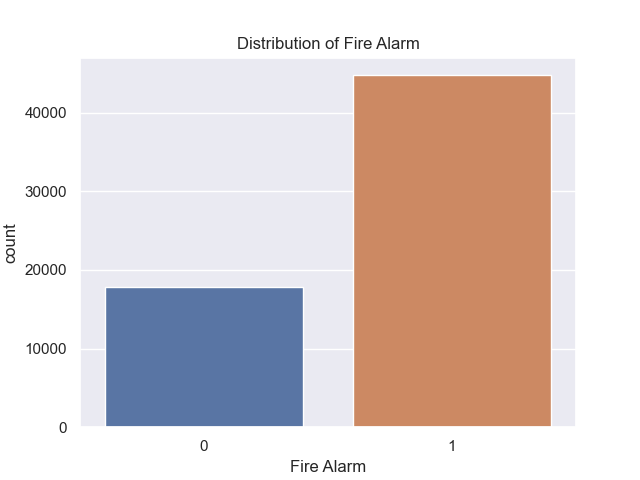

Text(0.5, 1.0, 'Distribution of Fire Alarm')

In [80]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Fire Alarm',data=df)
plt.title('Distribution of Fire Alarm')

In [81]:
corr = df.corr()
triangle = corr.abs().where(np.tril(np.ones(corr.shape), k=-1).astype(bool))
triangle.stack().sort_values(ascending = False)[:10]

NC1.0  PM2.5        0.999787
NC2.5  NC1.0        0.974249
       PM2.5        0.969382
PM2.5  PM1.0        0.956118
NC1.0  PM1.0        0.949860
NC0.5  PM1.0        0.940045
NC2.5  PM1.0        0.854901
NC0.5  PM2.5        0.798873
NC1.0  NC0.5        0.786274
NC0.5  eCO2[ppm]    0.699604
dtype: float64

In [82]:
df = df.drop(columns=['PM2.5', 'NC1.0'])

In [83]:
df.describe()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC0.5,NC2.5,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,491.463608,80.049042,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,4265.661251,1083.383189,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,8.820000,0.033000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,12.450000,0.044000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,14.420000,0.051000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,61482.030000,30026.438000,1.000000


In [84]:
Y = df['Fire Alarm']
X = df.drop(columns=['Fire Alarm'])

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [87]:
tf.random.set_seed(0)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

history = model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
1566/1566 [==============================] - 3s 1ms/step - loss: 0.1293 - accuracy: 0.9413 - precision: 0.9444 - recall: 0.9754
Epoch 2/30
1566/1566 [==============================] - 2s 1ms/step - loss: 0.0719 - accuracy: 0.9685 - precision: 0.9761 - recall: 0.9800
Epoch 3/30
1566/1566 [==============================] - 2s 1ms/step - loss: 0.0571 - accuracy: 0.9737 - precision: 0.9810 - recall: 0.9824
Epoch 4/30
1566/1566 [==============================] - 2s 1ms/step - loss: 0.0510 - accuracy: 0.9774 - precision: 0.9843 - recall: 0.9842
Epoch 5/30
1566/1566 [==============================] - 2s 1ms/step - loss: 0.0457 - accuracy: 0.9805 - precision: 0.9869 - recall: 0.9859
Epoch 6/30
1566/1566 [==============================] - 2s 1ms/step - loss: 0.0409 - accuracy: 0.9832 - precision: 0.9887 - recall: 0.9878
Epoch 7/30
1566/1566 [==============================] - 2s 1ms/step - loss: 0.0389 - accuracy: 0.9842 - precision: 0.9894 - recall: 0.9885
Epoch 8/30
1566/1566 [=====

<IPython.core.display.Javascript object>


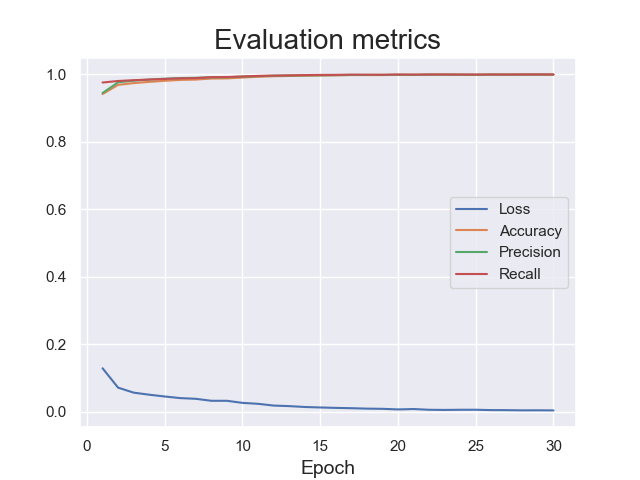

In [93]:
plt.plot(
    np.arange(1, 31), 
    history.history['loss'], label='Loss'
)
plt.plot(
    np.arange(1, 31), 
    history.history['accuracy'], label='Accuracy'
)
plt.plot(
    np.arange(1, 31), 
    history.history['precision'], label='Precision'
)
plt.plot(
    np.arange(1, 31), 
    history.history['recall'], label='Recall'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [89]:
predictions = model.predict(X_test_scaled)

392/392 [==============================] - 0s 843us/step


In [90]:
prediction_classes = [
    1 if prob > 0.5 else 0 for prob in np.ravel(predictions)
]

In [91]:
print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.5f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.5f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.5f}')

Accuracy: 0.99920
Precision: 0.99955
Recall: 0.99932


<IPython.core.display.Javascript object>


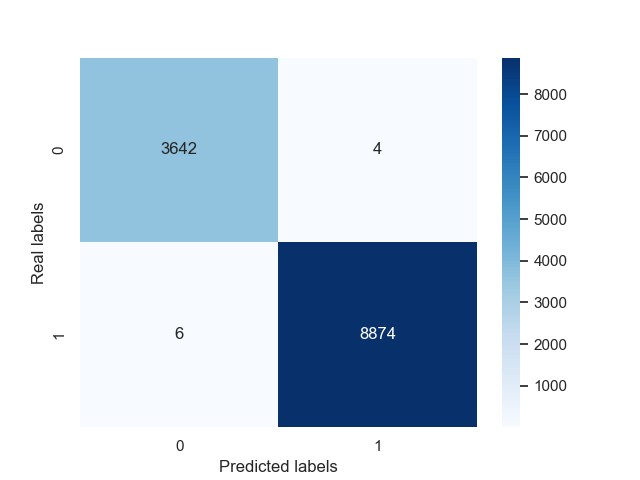

In [94]:
cnf_matrix = confusion_matrix(y_test, prediction_classes)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.ylabel('Real labels')
plt.xlabel('Predicted labels')
plt.show()